In [47]:
#! pip install duckdb


In [48]:
# Import tools

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [49]:
import duckdb

# Connect to DuckDB
con = duckdb.connect()

# Define the file path
file_path = r'C:\Users\User\Desktop\DATA SCIENCE CLASS\Class\Technical class\Self learn\Project\Supervised\Bank Classification Analysis\Data\bank.csv'

# Load CSV as a table
con.execute(f"""
    CREATE VIEW bank_data AS 
    SELECT * FROM read_csv_auto('{file_path}')
""")

# Check the first 5 rows from the bank_data view
result = con.execute("SELECT * FROM bank_data").df()
result


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,False,2343,True,False,unknown,5,may,1042,1,-1,0,unknown,True
1,56,admin.,married,secondary,False,45,False,False,unknown,5,may,1467,1,-1,0,unknown,True
2,41,technician,married,secondary,False,1270,True,False,unknown,5,may,1389,1,-1,0,unknown,True
3,55,services,married,secondary,False,2476,True,False,unknown,5,may,579,1,-1,0,unknown,True
4,54,admin.,married,tertiary,False,184,False,False,unknown,5,may,673,2,-1,0,unknown,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,False,1,True,False,cellular,20,apr,257,1,-1,0,unknown,False
11158,39,services,married,secondary,False,733,False,False,unknown,16,jun,83,4,-1,0,unknown,False
11159,32,technician,single,secondary,False,29,False,False,cellular,19,aug,156,2,-1,0,unknown,False
11160,43,technician,married,secondary,False,0,False,True,cellular,8,may,9,2,172,5,failure,False


In [50]:
df = result.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,False,2343,True,False,unknown,5,may,1042,1,-1,0,unknown,True
1,56,admin.,married,secondary,False,45,False,False,unknown,5,may,1467,1,-1,0,unknown,True
2,41,technician,married,secondary,False,1270,True,False,unknown,5,may,1389,1,-1,0,unknown,True
3,55,services,married,secondary,False,2476,True,False,unknown,5,may,579,1,-1,0,unknown,True
4,54,admin.,married,tertiary,False,184,False,False,unknown,5,may,673,2,-1,0,unknown,True


# 1) Exploratory Data Analysis

In [51]:
df.dtypes

age           int64
job          object
marital      object
education    object
default        bool
balance       int64
housing        bool
loan           bool
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit        bool
dtype: object

In [52]:
df.shape

(11162, 17)

In [53]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [54]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [55]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<Axes: >

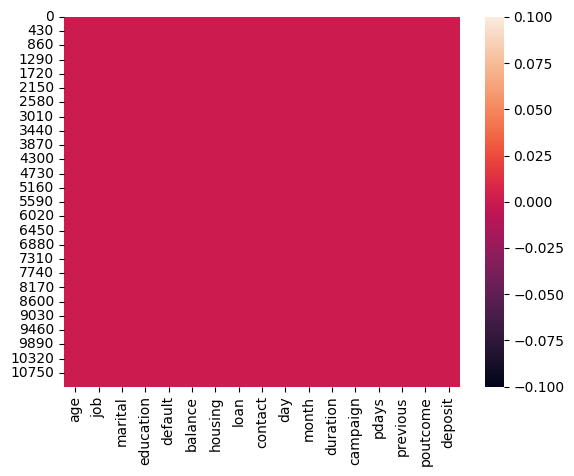

In [56]:
sns.heatmap(df.isnull())

In [57]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [59]:
# The dataset appears to be balanced in terms of the 'yes' and 'no' categories for the target variable.

# Visualization

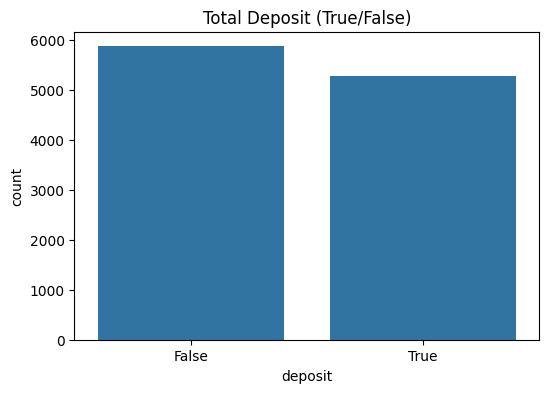

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='deposit')
plt.title('Total Deposit (True/False)')
plt.show()


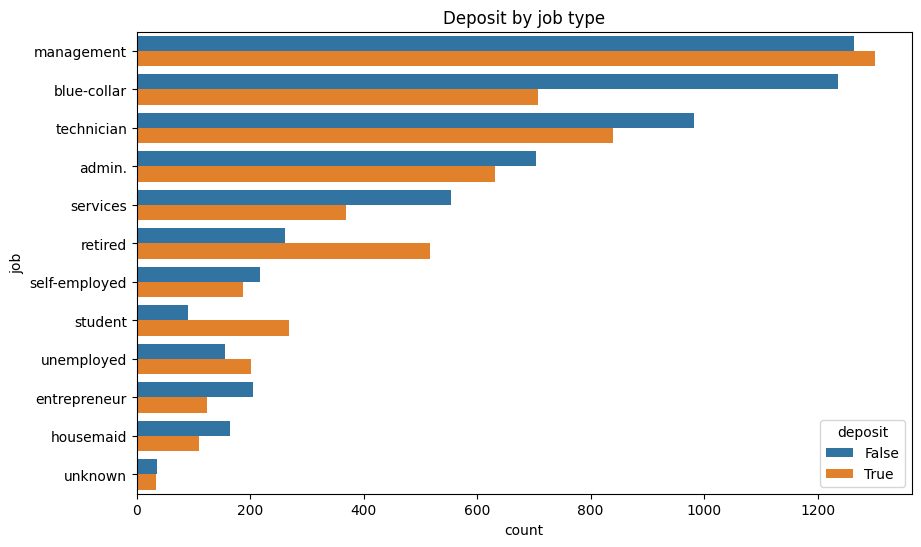

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='job', hue='deposit', order=df['job'].value_counts().index)
plt.title('Deposit by job type')
plt.show()


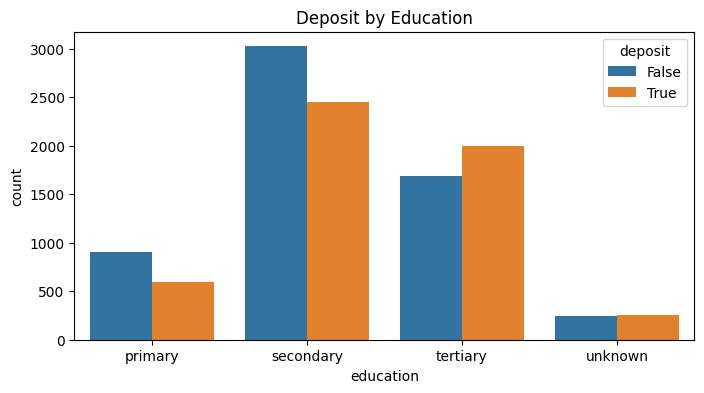

In [91]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='education', hue='deposit', order=['primary', 'secondary', 'tertiary', 'unknown'])
plt.title('Deposit by Education')
plt.show()


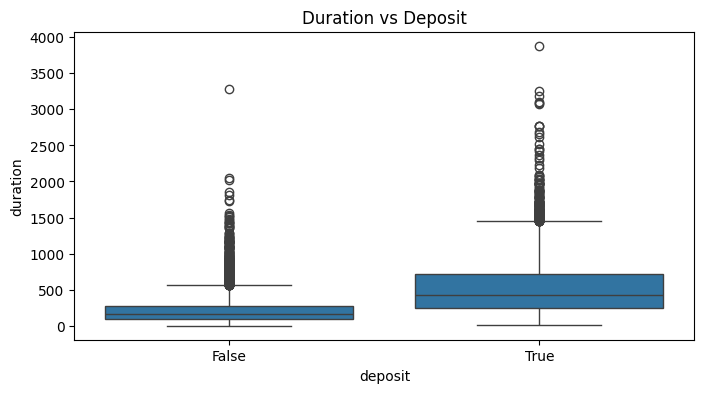

In [93]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='deposit', y='duration')
plt.title('Duration vs Deposit')
plt.show()


# 2) The dataset was separated into categorical and numerical features for further analysis and preprocessing.

In [70]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [71]:
df_numerical['previous'].unique() # add new feature pernah dihubungi dan tidak pernah dihubungi

array([ 0,  1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37])

In [72]:
df_category = df.select_dtypes(include=['object','bool'])
df_category.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,False,True,False,unknown,may,unknown,True
1,admin.,married,secondary,False,False,False,unknown,may,unknown,True
2,technician,married,secondary,False,True,False,unknown,may,unknown,True
3,services,married,secondary,False,True,False,unknown,may,unknown,True
4,admin.,married,tertiary,False,False,False,unknown,may,unknown,True


In [73]:
for col in df_category.columns:
    print(f"Value counts for column: {col}")
    print(df_category[col].value_counts())
    print("\n" + "-"*40 + "\n")


Value counts for column: job
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

----------------------------------------

Value counts for column: marital
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

----------------------------------------

Value counts for column: education
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

----------------------------------------

Value counts for column: default
default
False    10994
True       168
Name: count, dtype: int64

----------------------------------------

Value counts for column: housing
housing
False    5881
True     5281
Name: count, dtype: int64

----------------------------------------

Value cou

# Anamolies Detection
- Boxplot
- Distribution

<Axes: >

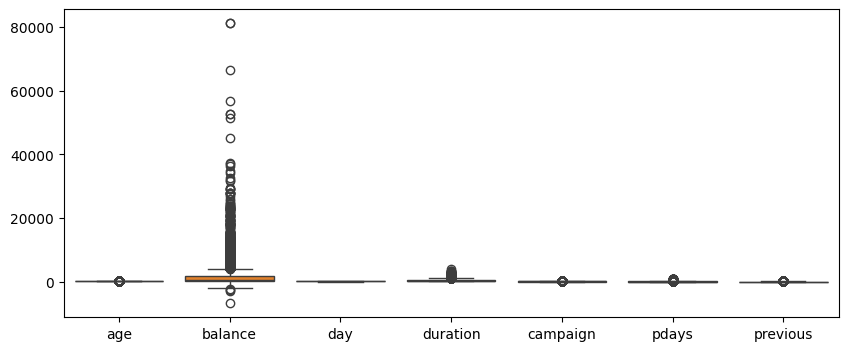

In [74]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_numerical)

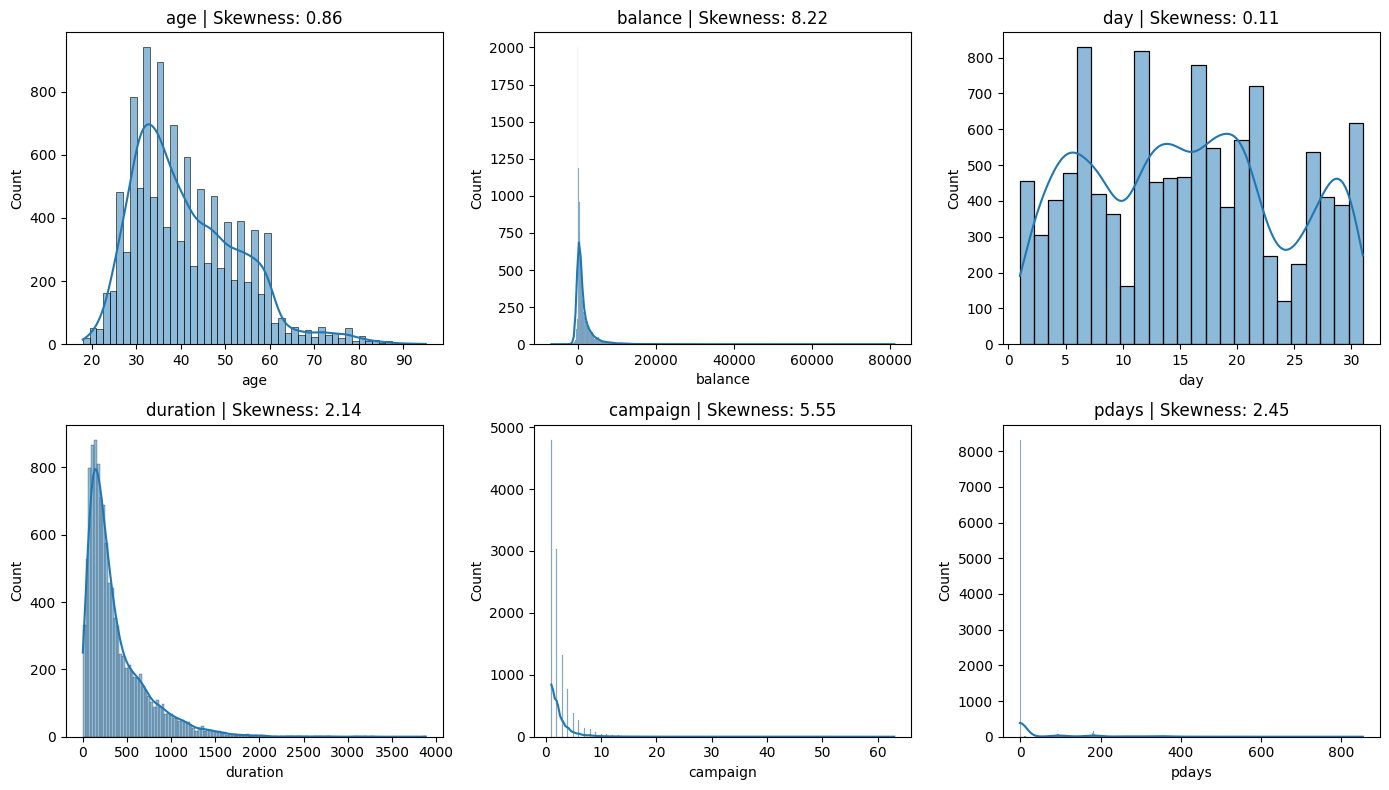

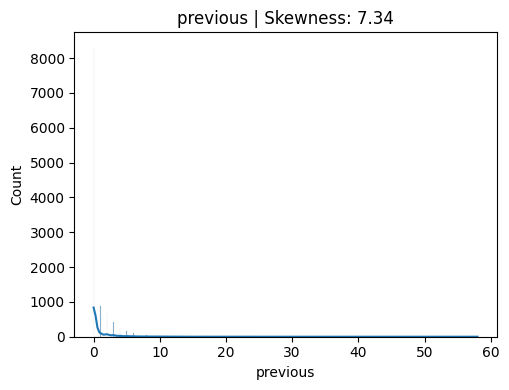

In [75]:
import math

batch_size = 6  
num_features = df_numerical.shape[1]

for i in range(0, num_features, batch_size):
    features_batch = df_numerical.columns[i:i+batch_size]
    rows = math.ceil(len(features_batch) / 3)
    plt.figure(figsize=(14, rows * 4))
    
    for idx, feature in enumerate(features_batch, 1):
        plt.subplot(rows, 3, idx)
        sns.histplot(df[feature], kde=True)
        plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    
    plt.tight_layout()
    plt.show()


# Scaling

In [76]:
df_numerical.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [77]:
previous_cluster = np.where(df_numerical['previous'] > 0, 1, 0)
previous_cluster_df = pd.DataFrame(previous_cluster, columns=['previous_cluster'])
previous_cluster_df.value_counts()

previous_cluster
0                   8324
1                   2838
Name: count, dtype: int64

In [78]:
previous_cluster_df.head()

,previous_cluster
0,0
1,0
2,0
3,0
4,0


In [79]:
previous_cluster_encoded = pd.get_dummies(previous_cluster_df['previous_cluster'], prefix='previous_cluster')
previous_cluster_encoded1 = previous_cluster_encoded.astype(int)
previous_cluster_encoded1


,previous_cluster_0,previous_cluster_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
11157,1,0
11158,1,0
11159,1,0
11160,0,1


In [80]:
df_numerical_select = df_numerical.copy()
df_numerical_selects = df_numerical_select.drop(['pdays','previous'], axis=1)
df_numerical_selects.head()


,age,balance,day,duration,campaign
0,59,2343,5,1042,1
1,56,45,5,1467,1
2,41,1270,5,1389,1
3,55,2476,5,579,1
4,54,184,5,673,2


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical_selects), columns=df_numerical_selects.columns)

df_numerical_scaled.head()

,age,balance,day,duration,campaign
0,1.491505,0.252525,-1.265746,1.930226,-0.554168
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168
3,1.155733,0.293762,-1.265746,0.596366,-0.554168
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785


<Axes: >

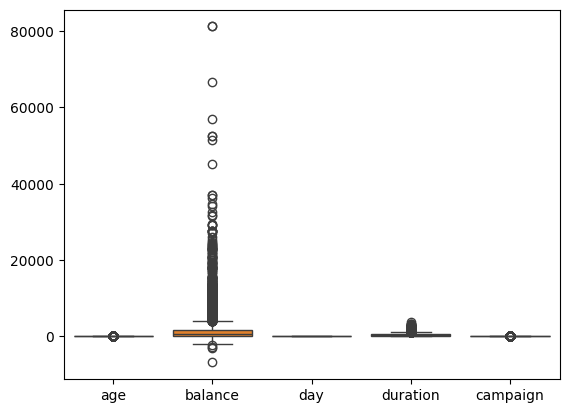

In [82]:
sns.boxplot(data=df_numerical_selects)

<Axes: >

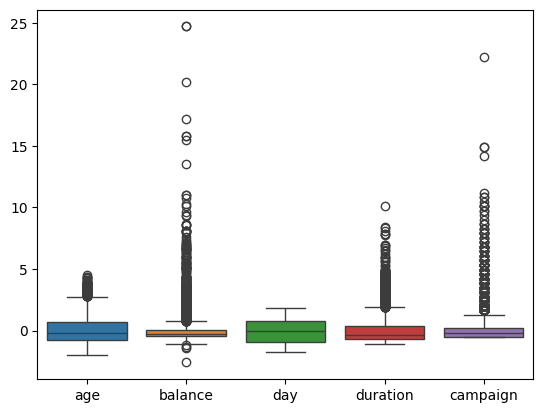

In [83]:
sns.boxplot(data=df_numerical_scaled)

# Encode

In [84]:
df_category.dtypes

job          object
marital      object
education    object
default        bool
housing        bool
loan           bool
contact      object
month        object
poutcome     object
deposit        bool
dtype: object

In [85]:
df_category.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,False,True,False,unknown,may,unknown,True
1,admin.,married,secondary,False,False,False,unknown,may,unknown,True
2,technician,married,secondary,False,True,False,unknown,may,unknown,True
3,services,married,secondary,False,True,False,unknown,may,unknown,True
4,admin.,married,tertiary,False,False,False,unknown,may,unknown,True


In [86]:
df_category['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_encoded = df_category.copy()


binary_features = ['default', 'housing', 'loan']
le = LabelEncoder()
for col in binary_features:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded['education'] = le.fit_transform(df_encoded['education'])

one_hot_cols = ['job', 'marital', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

In [97]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,education,default,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [98]:
# Merge all features
df_final = pd.concat([df_encoded, df_numerical_scaled, previous_cluster_encoded1], axis=1)
df_final.head()


,education,default,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,previous_cluster_0,previous_cluster_1
0,1,0,1,0,1,0,0,0,0,0,...,0,0,1,1.491505,0.252525,-1.265746,1.930226,-0.554168,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,1,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,1,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,1,1.155733,0.293762,-1.265746,0.596366,-0.554168,1,0
4,2,0,0,0,1,0,0,0,0,0,...,0,0,1,1.071790,-0.416876,-1.265746,0.867171,-0.186785,1,0


# Correlation and Multikolinerity analysis

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_fi)


vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data = vif_data[vif_data["Feature"] != "const"]

vif_data.sort_values(by="VIF", ascending=False)


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
40,previous_cluster_1,inf
39,previous_cluster_0,inf
33,poutcome_unknown,1062.526976
27,month_may,3.659247
17,marital_single,3.072971
25,month_jun,2.731257
16,marital_married,2.604959
8,job_management,2.538071
20,month_aug,2.510022
24,month_jul,2.424545


In [100]:
# I will remove the poutcome_unknown content because its VIF is too high due to being dominant in the poutcome column.
# I will also remove one content in previous_cluster, 
# specifically where previous equals 0 (clients who were never contacted before)."

# New Dataframe after remove

In [112]:
df_fs = df_final.copy()
df_fs.drop

df_fs1 = df_fs.drop(['previous_cluster_0','poutcome_unknown'], axis=1)
df_fs1.head()

,education,default,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,poutcome_other,poutcome_success,age,balance,day,duration,campaign,previous_cluster_1
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1.491505,0.252525,-1.265746,1.930226,-0.554168,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1.239676,-0.459974,-1.265746,3.154612,-0.554168,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1.155733,0.293762,-1.265746,0.596366,-0.554168,0
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1.071790,-0.416876,-1.265746,0.867171,-0.186785,0


# Feature Importance

C:\Users\User\AppData\Local\Temp\ipykernel_10840\3633471641.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


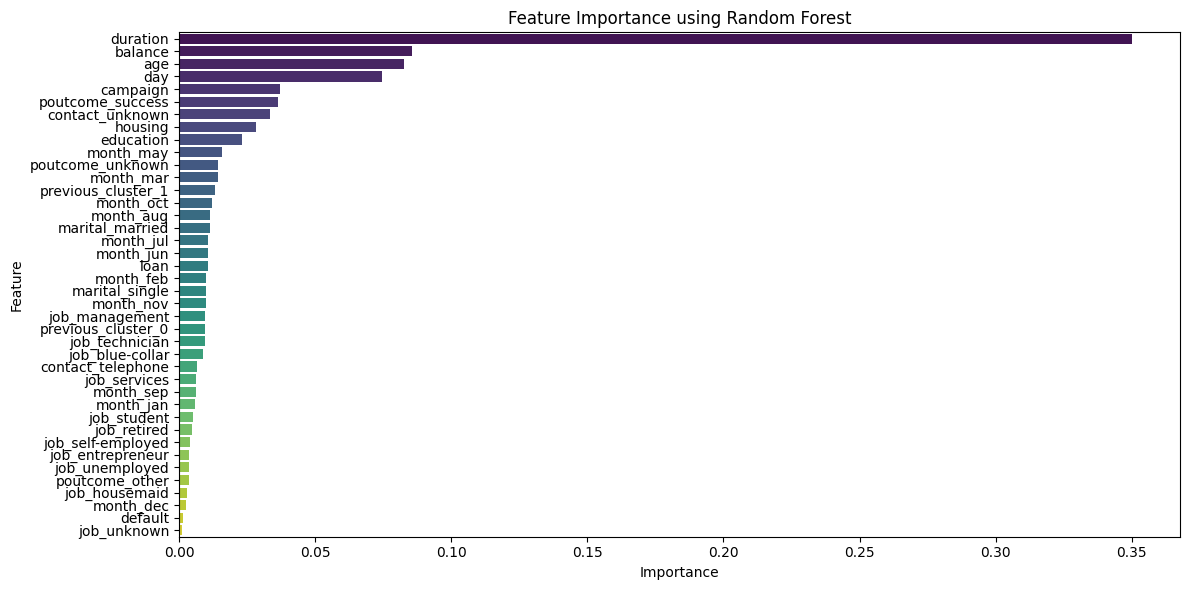

,Feature,Importance
36,duration,0.350233
34,balance,0.085450
33,age,0.082576
35,day,0.074502
37,campaign,0.037009


In [129]:
from sklearn.ensemble import RandomForestClassifier

X_fi = df_final.drop(columns='deposit')
y_fi = df_final['deposit']

model = RandomForestClassifier(random_state=42)
model.fit(X_fi, y_fi)

importances = model.feature_importances_
feature_names = X_fi.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance using Random Forest')
plt.tight_layout()
plt.show()

feature_importance_df.head()


# RUN MODEL
- Using Label encode by using Random Forest to reduce the dimension of dataframe

In [130]:
df_fs1.head()

,education,default,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,poutcome_other,poutcome_success,age,balance,day,duration,campaign,previous_cluster_1
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1.491505,0.252525,-1.265746,1.930226,-0.554168,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1.239676,-0.459974,-1.265746,3.154612,-0.554168,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1.155733,0.293762,-1.265746,0.596366,-0.554168,0
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1.071790,-0.416876,-1.265746,0.867171,-0.186785,0


In [131]:
X = df_fs1.drop("deposit", axis=1)
y = df_fs1["deposit"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)



rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))


y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

Random Forest Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.84      0.83      0.83      2233



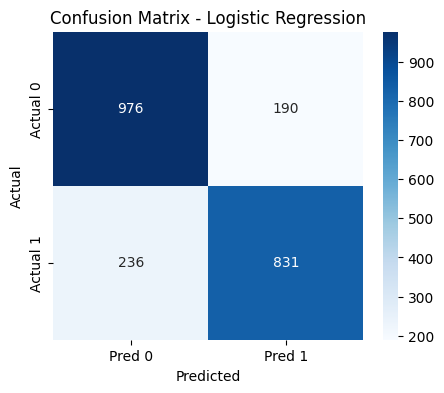

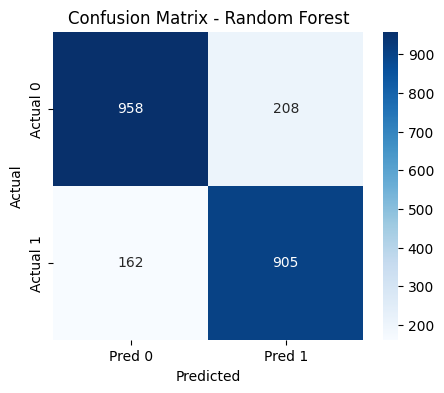

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix(cm, model_name):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["Pred 0", "Pred 1"], 
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_conf_matrix(cm_log, "Logistic Regression")
plot_conf_matrix(cm_rf, "Random Forest")
